In [1]:
# importing libraries
import numpy as np
import pandas as pd

import acquire
import prepare

## Removing non-english strings

In [2]:
# def isEnglish(s):
#     try:
#         s.encode(encoding='utf-8').decode('ascii')
        
#     except UnicodeDecodeError:
#         return False
#     else:
#         return True

In [3]:
## testing function
#isEnglish(df.readme_contents[3])

In [4]:
# df[df.readme_contents.apply(isEnglish) == True]

# Importing clean data

In [5]:
# importing csv and reading to df

csv = 'NLP.csv'

df = pd.read_csv(csv)

df.head()

,Unnamed: 0,repo,language,readme_contents,clean,stemmed,lemmatized
0,0,python-discord/bot,Python,# Python Utility Bot\n\n[![Discord][7]][8]\n[!...,python utility bot discord78 lint test12 build...,python util bot discord78 lint test12 build34 ...,python util bot discord78 lint test12 build34 ...
1,4,microsoft/BotBuilder-Samples,JavaScript,\r\n# ![Bot Framework Samples](./docs/media/Bo...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...
2,5,GAwesomeBot/bot,JavaScript,# GAwesomeBot\n[![Travis Status](https://travi...,gawesomebot travis statushttpstravisciorggilbe...,gawesomebot travi statushttpstravisciorggilber...,gawesomebot travi statushttpstravisciorggilber...
3,6,roughike/BottomBar,Java,# BottomBar (Deprecated)\n\nI don't have time ...,bottombar deprecated dont time maintain anymor...,bottombar deprec dont time maintain anymor bas...,bottombar deprec dont time maintain anymor bas...
4,7,mithun-prasad/Bot,C#,# Developing and Deploying Intelligent Chat Bo...,developing deploying intelligent chat bots tra...,develop deploy intellig chat bot train resourc...,develop deploy intellig chat bot train resourc...


## Univariate Analysis of Target Frequency

<AxesSubplot:ylabel='language'>

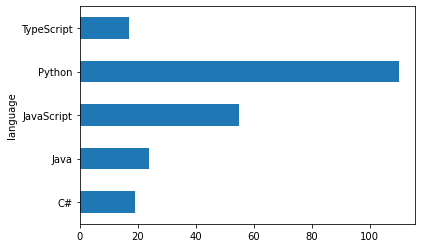

In [6]:
df.groupby('language').agg('count')['lemmatized'].plot.barh()

In [7]:
df.language.value_counts()

Python        112
JavaScript     55
Java           24
C#             20
TypeScript     17
Name: language, dtype: int64

In [8]:
df.language.value_counts(normalize = True)

Python        0.491228
JavaScript    0.241228
Java          0.105263
C#            0.087719
TypeScript    0.074561
Name: language, dtype: float64

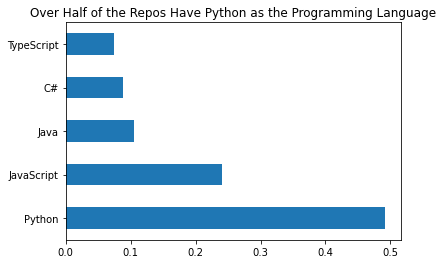

In [9]:
import matplotlib.pyplot as plt

df.language.value_counts(normalize = True).plot.barh()
plt.title('Over Half of the Repos Have Python as the Programming Language')
plt.show();

# Splitting data

In [50]:
train, validate, test = prepare.split_data(df)

In [51]:
train.shape, validate.shape, test.shape

((127, 7), (55, 7), (46, 7))

In [52]:
train.head()

,Unnamed: 0,repo,language,readme_contents,clean,stemmed,lemmatized
222,580,botgram/botgram,JavaScript,[![Botgram](./docs/splash.png)](https://botgra...,botgramdocssplashpnghttpsbotgramjsorg bots spe...,botgramdocssplashpnghttpsbotgramjsorg bot spec...,botgramdocssplashpnghttpsbotgramjsorg bot spec...
97,244,odysseusmax/animated-lamp,Python,# [Screenshotit_bot](https://tx.me/screenshoti...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...
182,479,agermanidis/SnapchatBot,Python,<h1 style='color: red'>This repo is deprecated...,h1 stylecolor redthis repo deprecated due chan...,h1 stylecolor redthi repo deprec due chang sna...,h1 stylecolor redthi repo deprec due chang sna...
108,270,NotSoSuper/NotSoBot,Python,# NotSoBot\n### Requires:\n- Python 3.5\n- [di...,notsobot requires python 35 discordpyhttpsgith...,notsobot requir python 35 discordpyhttpsgithub...,notsobot requir python 35 discordpyhttpsgithub...
176,467,boto/boto3-sample,Python,=========================\nBoto 3 Sample Appli...,boto 3 sample application application implemen...,boto 3 sampl applic applic implement drop vide...,boto 3 sampl applic applic implement drop vide...


In [56]:
# dropping the duplicate index col

for df in train, validate, test:
    df.drop(columns = ['Unnamed: 0'], inplace = True)

In [57]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
222,botgram/botgram,JavaScript,[![Botgram](./docs/splash.png)](https://botgra...,botgramdocssplashpnghttpsbotgramjsorg bots spe...,botgramdocssplashpnghttpsbotgramjsorg bot spec...,botgramdocssplashpnghttpsbotgramjsorg bot spec...
97,odysseusmax/animated-lamp,Python,# [Screenshotit_bot](https://tx.me/screenshoti...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...
182,agermanidis/SnapchatBot,Python,<h1 style='color: red'>This repo is deprecated...,h1 stylecolor redthis repo deprecated due chan...,h1 stylecolor redthi repo deprec due chang sna...,h1 stylecolor redthi repo deprec due chang sna...
108,NotSoSuper/NotSoBot,Python,# NotSoBot\n### Requires:\n- Python 3.5\n- [di...,notsobot requires python 35 discordpyhttpsgith...,notsobot requir python 35 discordpyhttpsgithub...,notsobot requir python 35 discordpyhttpsgithub...
176,boto/boto3-sample,Python,=========================\nBoto 3 Sample Appli...,boto 3 sample application application implemen...,boto 3 sampl applic applic implement drop vide...,boto 3 sampl applic applic implement drop vide...


## Word Frequency Exploration

In [41]:
list(train.language.unique())

['Python', 'JavaScript', 'Java', 'C#', 'TypeScript']

In [58]:
# combining the text strings for each language

# creating dfs
df_python = train[train.language == 'Python']
df_js = train[train.language == 'Javascript']
df_java = train[train.language == 'Java']
df_c = train[train.language == 'C#']
df_type = train[train.language == 'TypeScript']

In [59]:
# generating text strings for each df
python_words = ' '.join(df_python.lemmatized.astype(str))
js_words = ' '.join(df_js.lemmatized.astype(str))
java_words = ' '.join(df_java.lemmatized.astype(str))
c_words = ' '.join(df_c.lemmatized.astype(str))
type_words = ' '.join(df_type.lemmatized.astype(str))

In [81]:
# creating a df for the word count and frequency
# word count
df_python_count = pd.DataFrame(pd.Series(python_words.split()).value_counts(), columns = ['word_cnt']).head(20)

# word frequency
df_python_count['word_freq'] = pd.Series(python_words.split()).value_counts(normalize = True)

# df view
df_python_count

,word_cnt,word_freq
bot,418,0.018825
use,341,0.015358
instal,264,0.011890
python,248,0.011169
file,213,0.009593
run,159,0.007161
support,139,0.006260
account,130,0.005855
user,117,0.005269
option,117,0.005269


In [101]:
import seaborn as sns

plt.figure(figsize = (20, 10))

sns.catplot(data = df_python_count, x = 'index', y = 'word_freq' )

ValueError: Could not interpret input 'index'

<Figure size 1440x720 with 0 Axes>

In [102]:
df_p.index

Int64Index([160, 178, 130, 151,  80, 141, 140,  79, 197,  20,  42, 183, 166,
             82,  24, 212,  19,  53, 107, 156, 169, 132,  81, 190, 219, 211,
            172,  33, 157,  31,  71, 186, 210, 201, 120,   4,  37,  72,  21,
            133, 114, 175, 100, 173,  23,  61],
           dtype='int64')